In [58]:
#importing needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#model algorithms from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb

#model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
#loading dataset
df = pd.read_csv(r'C:\Users\user\Documents\HAMOYE DATA SCIENCE\STAGE C (CLASSIFICATIONS)\Assignment\Data_for_UCI_named.csv')
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


Data has 1000 rows and 14 Cloumns i.e 13 independent features and one target variable

In [11]:
#Checking for missing data
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

The data has no missing data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


There is need to encode the target variable since it is an object type

unstable    6380
stable      3620
Name: stabf, dtype: int64


<AxesSubplot:>

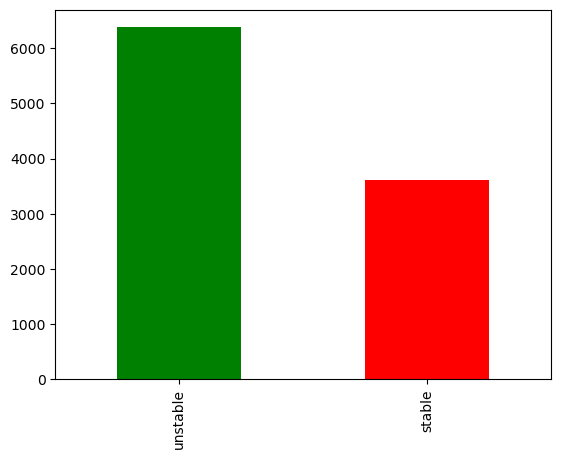

In [12]:
#finding out how many of each classes are there
print(df['stabf'].value_counts())
df['stabf'].value_counts().plot(kind = 'bar', color = ['green', 'red'])

The target variable has 2 unbalanced classes (Unstable = 6380, and Stable = 3620)

In [18]:
#Encoding target variable
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder() 
df['stabf'] = encoder.fit_transform(df['stabf'])

In [20]:
df['stabf'].replace([1, 0], [0, 1], inplace=True)
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,0
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,1
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,1
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,0


0 = Unstable, 1 = Stable

In [21]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731,0.362000
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919,0.480603
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760,0.000000
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557,0.000000
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142,0.000000
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878,1.000000
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403,1.000000


In [22]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 1.1 MB


Now, the data has no object variable.

In [23]:
corr_mat = df.corr()
corr_mat

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
tau1,1.000000,0.015586,-0.005970,-0.017265,0.027183,-0.015485,-0.015924,-0.015807,0.010521,0.015350,-0.001279,0.005494,0.275761,-0.234898
tau2,0.015586,1.000000,0.014273,-0.001965,-0.004769,0.006573,0.007673,-0.005963,-0.001742,0.015383,0.016508,-0.011764,0.290975,-0.246280
tau3,-0.005970,0.014273,1.000000,0.004354,0.016953,-0.003134,-0.008780,-0.017531,-0.011605,0.007671,0.014702,-0.011497,0.280700,-0.237492
tau4,-0.017265,-0.001965,0.004354,1.000000,-0.003173,0.010553,0.006169,-0.011211,-0.004149,0.008431,0.003260,-0.000491,0.278576,-0.239375
p1,0.027183,-0.004769,0.016953,-0.003173,1.000000,-0.573157,-0.584554,-0.579239,0.000721,0.015405,0.001069,-0.015451,0.010278,-0.009938
p2,-0.015485,0.006573,-0.003134,0.010553,-0.573157,1.000000,0.002388,-0.006844,0.015603,-0.018032,0.007555,0.019817,0.006255,-0.006173
p3,-0.015924,0.007673,-0.008780,0.006169,-0.584554,0.002388,1.000000,0.012953,-0.003219,-0.011575,-0.005897,-0.010485,-0.003321,0.000649
p4,-0.015807,-0.005963,-0.017531,-0.011211,-0.579239,-0.006844,0.012953,1.000000,-0.013636,0.002850,-0.003515,0.017505,-0.020786,0.022785
g1,0.010521,-0.001742,-0.011605,-0.004149,0.000721,0.015603,-0.003219,-0.013636,1.000000,0.007559,-0.005836,0.012431,0.282774,-0.197664
g2,0.015350,0.015383,0.007671,0.008431,0.015405,-0.018032,-0.011575,0.002850,0.007559,1.000000,-0.012809,-0.014909,0.293601,-0.217341


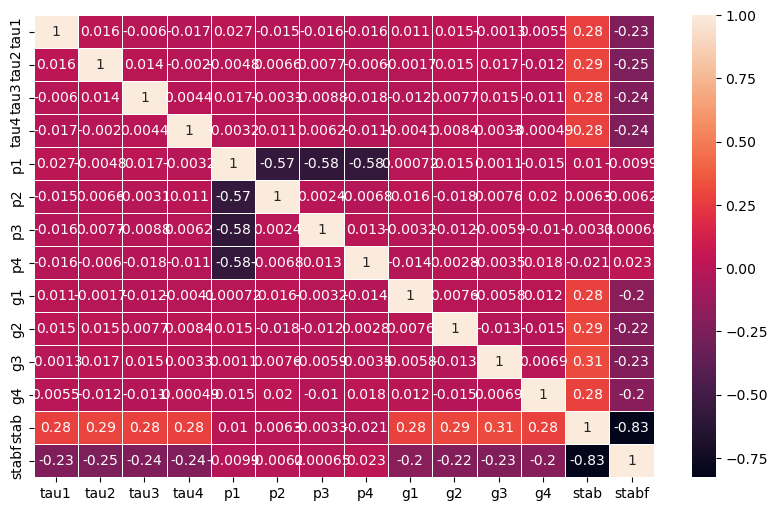

In [24]:
#Visualising the Correlation
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_mat, linewidths=0.5, annot=True );

# DATA SPLITTING

In [25]:
#Splitting dataset into x and y
x = df.drop('stabf', axis = 1)
y = df['stabf']

In [47]:
#Splitting data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [59]:
#putting models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random forest": RandomForestClassifier(), 
    "xgb": xgb.XGBClassifier(),
    "lgb": lgb.LGBMClassifier(),
    "ExtratreeClassifier": ExtraTreesClassifier()
}

#setting up a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):

    #setting up a random seed
    np.random.seed(42)
    
    #making a dictionary to keep model scores
    model_scores = {}

    #leaping through models
    for name, model in models.items():
        #fitting the model to the data
        model.fit(x_train, y_train)
    
        #evaluating the model and appending its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [60]:
#calling the created function
scores = fit_and_score(models=models,
                      x_train=x_train,
                      x_test=x_test,
                      y_train=y_train,
                      y_test=y_test)
scores

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this 

{'Logistic Regression': 0.891,
 'KNN': 0.7833333333333333,
 'Random forest': 1.0,
 'xgb': 1.0,
 'lgb': 1.0,
 'ExtratreeClassifier': 0.9923333333333333}

Logistic Regression has 0.891 accuracy score.

KNighbors Classifier has 0.78333 accuracy score.

The randomforest Classifier has 1.0 accuracy score when assessed.

Xgboost also had 1.0 accuracy score.

LGBM also had 1.0 accuracy score

ExtatreeClassifier had 0.992333 accuracy score

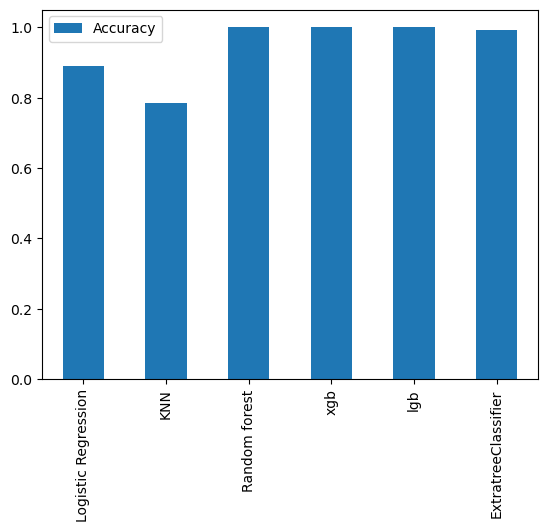

In [61]:
#plot view of the algorithms performance
models_compare = pd.DataFrame(scores, index=['Accuracy'])
models_compare.T.plot.bar();

# Predicting with XGBoost

In [65]:
xgbmodel = xgb.XGBClassifier()
xgbmodel.fit(x_train, y_train)

xgbmodel.score(x_test, y_test)

1.0

In [66]:
y_preds = xgbmodel.predict(x_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
y_test

3898    0
6111    0
4123    0
718     0
3132    1
       ..
3919    1
1656    0
1533    0
2986    0
4860    0
Name: stabf, Length: 3000, dtype: int64

[[1914    0]
 [   0 1086]]


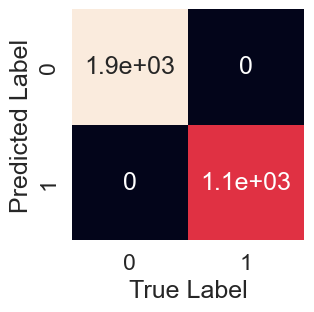

In [68]:
print(confusion_matrix(y_test, y_preds))

#Visualising Confusion Matrix
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    
plot_conf_mat(y_test, y_preds)

In [97]:
#Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1914
           1       1.00      1.00      1.00      1086

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



# Hyperparameter tuning  of Extratrees Classifiers

In [74]:
#Creating RandomizedCV Hyperparameter Grid for ExtratreeClassifier
Extratree_grid = {'n_estimators': np.arange(10, 1000, 50),
              'max_features': [None, 3, 5, 10],
              'min_samples_split': np.arange(2, 20, 2),
              'min_samples_leaf': np.arange(1, 20, 2)}

#Tuning RandomforestClassifier
np.random.seed(42)

#Set up random hyperparameter search for ExtratreeClassifier
Randsearch_Extratree = RandomizedSearchCV(ExtraTreesClassifier(), param_distributions=Extratree_grid, cv=5, n_iter=10, 
                                          scoring='accuracy', n_jobs=-1, verbose=1, random_state=1)

#fitting random hyperparameter search model for ExtratreeClassifier
Randsearch_Extratree.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'max_features': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   random_state=1, scoring='accuracy', verbose=1)

In [75]:
Randsearch_Extratree.best_params_

{'n_estimators': 760,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': None}

The above are the best parameters after hyperparameter tuning.

In [76]:
Randsearch_Extratree.score(x_test, y_test)

1.0

After Hyperparameter tuning, the accuracy score of the optimal model was improved from 0.99 to 1.0 when compared to the initial ExtratreeClassifier model.

# Feature importance using Optimal Extratreeclassifier Model

In [86]:
#Creating a new Classifier with the best parameter
clf = ExtraTreesClassifier(n_estimators=760, min_samples_split=6, min_samples_leaf=3, max_features=None)

#fitting clf to the trained model
clf.fit(x_train, y_train)

#Check coefficients
clf.feature_importances_

array([9.94284248e-03, 1.63732750e-02, 9.93896490e-03, 1.18963405e-02,
       2.12208411e-04, 2.71416323e-04, 2.49749822e-04, 2.35774264e-04,
       2.00245568e-03, 2.56267622e-03, 4.02073160e-03, 3.93478872e-03,
       9.38358776e-01])

In [95]:
#Creating feature dictionary
feature_dict = dict(zip(df.columns, list(clf.feature_importances_)))
feature_dict

{'tau1': 0.009942842476072898,
 'tau2': 0.016373275014821085,
 'tau3': 0.00993896490259457,
 'tau4': 0.011896340523470699,
 'p1': 0.0002122084114826057,
 'p2': 0.0002714163228668483,
 'p3': 0.0002497498218012749,
 'p4': 0.00023577426357277,
 'g1': 0.002002455676813931,
 'g2': 0.0025626762154322526,
 'g3': 0.004020731604493664,
 'g4': 0.003934788718063563,
 'stab': 0.9383587760485139}

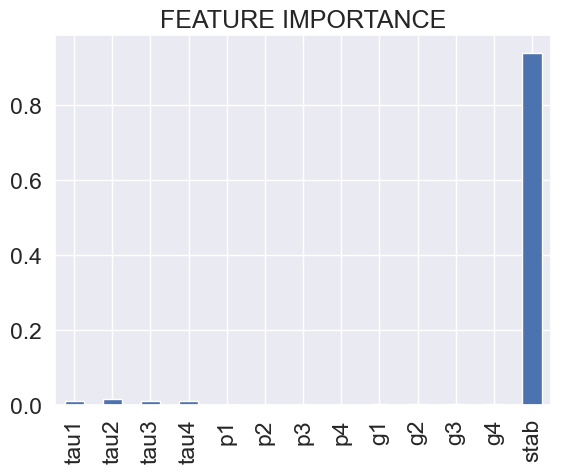

In [96]:
#Visualize Feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title = 'FEATURE IMPORTANCE', legend = False);

From the feature importance plot above, 'Stab' feature has a positive correlation with the target variable and it has a very strong importance in predicting the model

g1, p1 has the least importance according to the model

# Installing Needed Libraries

In [34]:
pip install xgboost


     -------------------------------------- 70.9/70.9 MB 733.7 kB/s eta 0:00:00


In [52]:
pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 662.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
